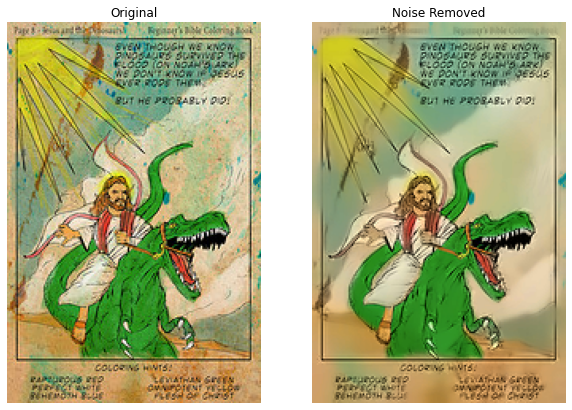

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

orig = cv2.imread('sample.jpg')
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
denoised = cv2.fastNlMeansDenoisingColored(orig,None,10,10,7,21)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
ax1.axis("off")
ax1.title.set_text('Original')
        
ax2.axis("off")
ax2.title.set_text("Noise Removed")
        
ax1.imshow(orig)
ax2.imshow(denoised)

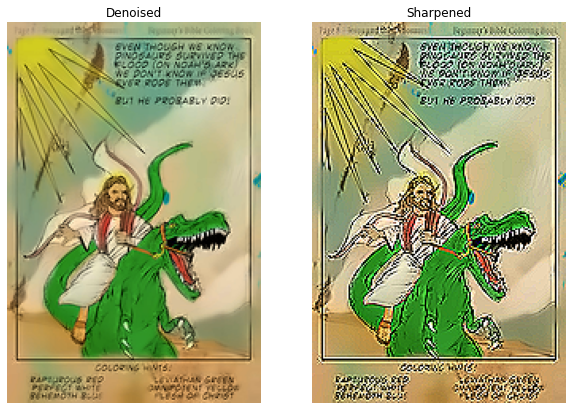

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('denoised.png')
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(src=denoised, ddepth=-1, kernel=kernel)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
ax1.axis("off")
ax1.title.set_text('Denoised')
        
ax2.axis("off")
ax2.title.set_text("Sharpened")
        
ax1.imshow(denoised)
ax2.imshow(sharpened)

True

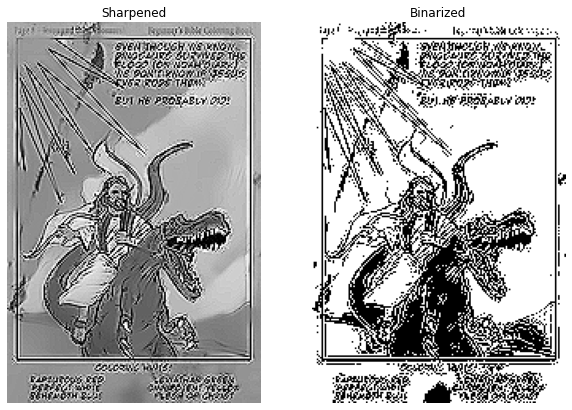

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

def load_image(image_file, gray_scale=False):
    img = image_file
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    open_cv_img = np.array(rgb_img) 
    # Convert RGB to BGR 
    image_src = open_cv_img[:, :, ::-1].copy() 
    
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

def binarize(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = load_image(image_file=image_file, gray_scale=gray_scale)
    th, image_b = cv2.threshold(src=image_src, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Sharpened')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

# Loop through all the images in the dataset

# Binarization
binarize(sharpened, with_plot=True, gray_scale=True)